# Yelp Dataset Exploratory Data Analysis: Project Overview

- Explore Yelp business dataset and manipulate data with NumPy and Pandas
- Identify and explore features 
- Add features as needed
- Identify outliers
- Map out businesses to better understand business location and Yelp reviews
- This dataset will later be used for a categorical model
- This code script is greatly inspired by Kyle McKiou and Ardit Sulce

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import and preview data set

In [2]:
file = 'yelp_academic_dataset_business.json'
data = pd.read_json(file, lines=True)

In [3]:
df = pd.DataFrame(data)

In [4]:
df1 = pd.DataFrame(data) # df1 created for reference

In [5]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


- Appears to be 160,585 records, 5 numeric features and 9 categorical features
- **'attributes'** and **'hours'** contain null values

### Feature Assumptions

- **'business_id'** - Identifying key <br>
- **'name'** - Name of business <br>
- **'address'** - Address of business <br>
- **'city'** - City residence of business <br>
- **'state'** - State residence of business <br>
- **'postal_code'** - Postal code of business <br>
- **'latitude'** and 'longitude' - The latitutude and longitude of the business <br>
- **'stars'** - Yelp review rating <br>
- **'review_count'** - Number of reviews of the business <br>
- **'is_open'** - Indicates whether or not a business is still operating <br>
- **'attributes'** - Listing of business amenities <br>
- **'categories'** - Categories of a business <br>
- **'hours'** - Hours of operation of a business

#### Define numeric and categorical features

In [7]:
def find_num_cols(data):
    """returns list of numeric features"""
    cols = data.select_dtypes(include=[np.number])
    list_num = [print(x) for x in cols.columns]
    return list_num

In [8]:
def find_cat_cols(data):
    """returns list of categorical features"""
    cols = data.select_dtypes(exclude=[np.number])
    list_cat = [print(x) for x in cols.columns]
    return list_cat

In [9]:
 find_num_cols(df)

latitude
longitude
stars
review_count
is_open


[None, None, None, None, None]

In [10]:
find_cat_cols(df)

business_id
name
address
city
state
postal_code
attributes
categories
hours


[None, None, None, None, None, None, None, None, None]

### Add Regional column to the DataFrame
- States categorized by regions defined by US Census Bureau

In [11]:
def states_to_region(df, col, new):
    """create region column based on states"""
    NE = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
    MW = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
    S = ['DE', 'FL', 'GA', 'NC', 'SC', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX', 'MD', 'VA']
    W = ['AZ', 'CO', 'ID', 'MO', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
    C = ['BC', 'ON', 'ABE']
    
    reg = []
    for x in df[col]:
        if x in NE:
            reg.append('Northeast')
        elif x in MW:
            reg.append('Midwest')
        elif x in S:
            reg.append('South')
        elif x in W:
            reg.append('West')
        elif x in C:
            reg.append('Canada')
        else:
            reg.append('error')
            
    df[new] = reg
    
    return df[new]

In [12]:
states_to_region(df, 'state', 'region').head()

0     West
1     West
2     West
3    South
4    South
Name: region, dtype: object

In [13]:
df['region'].value_counts()

South        64490
Northeast    36019
West         31512
Canada       17301
Midwest      11263
Name: region, dtype: int64

<AxesSubplot:>

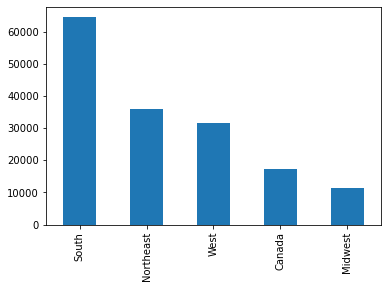

In [14]:
df['region'].value_counts().plot(kind='bar')

- **'South'** region clearly has the most reviews, but also has the largest region.
- **'Northeast'**, which has the smallest region, is the second most reviewed region.

In [15]:
# check for 'errors'
df['region'][df['region'] == 'error']

Series([], Name: region, dtype: object)

#### Describe numeric and categorical features

In [16]:
df.describe(include = [np.number]) # describe numeric features

,latitude,longitude,stars,review_count,is_open
count,160585.000000,160585.000000,160585.000000,160585.000000,160585.000000
mean,38.759794,-94.266212,3.656954,51.964548,0.767494
std,7.138042,19.975446,0.943604,130.030448,0.422431
min,27.998972,-123.393929,1.000000,5.000000,0.000000
25%,30.355886,-122.589583,3.000000,8.000000,1.000000
50%,42.177366,-84.383281,4.000000,17.000000,1.000000
75%,45.458531,-81.288501,4.500000,44.000000,1.000000
max,49.490000,71.113271,5.000000,9185.000000,1.000000


In [17]:
df.describe(include = ['O']) # describe categorical features

,business_id,name,address,city,state,postal_code,attributes,categories,hours,region
count,160585,160585,160585,160585,160585,160585,145593,160470,133244,160585
unique,160585,125850,123895,836,31,5779,67907,88115,50857,5
top,hdNmNaHXRUTZfZXKU6l-Mg,Starbucks,,Austin,MA,78704,{'BusinessAcceptsCreditCards': 'True'},"Beauty & Spas, Hair Salons","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",South
freq,1,852,6726,22416,36012,2084,9316,757,5708,64490


### Remove features not needed for model
- To simplify this model, **'attributes'** and **'hours'** will also be removed for now.
- **'name'**, **'business_id'**, **'is_open'**, and **'postal_code'** will be removed for lack of causation.

In [18]:
df = df.drop(columns=['business_id', 'name', 'address', 'postal_code', 'attributes', 'hours'])

In [19]:
df.head()

,city,state,latitude,longitude,stars,review_count,is_open,categories,region
0,Boulder,CO,40.017544,-105.283348,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",West
1,Portland,OR,45.588906,-122.593331,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",West
2,Portland,OR,45.511907,-122.613693,4.5,13,1,"Antiques, Fashion, Used, Vintage & Consignment...",West
3,Orange City,FL,28.914482,-81.295979,3.0,8,1,"Beauty & Spas, Hair Salons",South
4,Atlanta,GA,33.747027,-84.353424,4.0,14,1,"Gyms, Active Life, Interval Training Gyms, Fit...",South


- At this point, focus will shift to 'review_count' as measure of popularity (whether good or bad) and customer engagement

### Remove records with 'review_count' *less than* a value of 30

- Businesses with less than 30 reviews are dropped.

In [20]:
def drop_under_30_count(df, col):
    """drop records that have a frequncy less than 30 in given column/dataframe"""
    drop_rec = df[df[col] < 30].index
    df.drop(drop_rec, inplace=True)

In [21]:
drop_under_30_count(df, 'review_count')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55055 entries, 0 to 160584
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          55055 non-null  object 
 1   state         55055 non-null  object 
 2   latitude      55055 non-null  float64
 3   longitude     55055 non-null  float64
 4   stars         55055 non-null  float64
 5   review_count  55055 non-null  int64  
 6   is_open       55055 non-null  int64  
 7   categories    55053 non-null  object 
 8   region        55055 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.2+ MB


- Note that record entries are now 55,055 down from 160584

### Identify potential outliers

##### Identify high and low record frequency or value counts

In [23]:
def column_min_max(df, col):
    """Identify max, min, average, median of unique records and frequency"""
    u_max = df[col].unique().max()
    u_min = df[col].unique().min()
    u_std = df[col].unique().std()
    f_max = df[col].value_counts().max()
    f_min = df[col].value_counts().min()
    f_std = df[col].value_counts().std()
    mm = f'Unique record max: {u_max}\nUnique record min: {u_min}\nUnique record std: {u_std}\nFrequency max: {f_max}\nFrequency min: {f_min}\nFrequency std: {f_std}'
    
    return print(mm)

    

In [24]:
column_min_max(df, 'review_count')

Unique record max: 9185
Unique record min: 30
Unique record std: 791.030988544761
Frequency max: 1394
Frequency min: 1
Frequency std: 138.19539899898734


In [25]:
def plot_outs(df, col):
    """plot to identify outliers"""
    plt.figure(figsize = (6, 8))
    x = df[col].unique()
    y = df[col].value_counts()
    plt.scatter(x, y)
    plt.xlabel(xlabel=(col), fontsize=('large'))
    plt.ylabel(ylabel=('Frequency'), fontsize=('large'))
    plt.show()

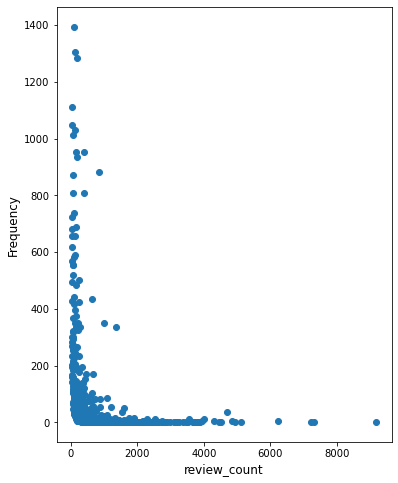

In [26]:
plot_outs(df, 'review_count')

- Distribution clusters mostly in the lower review counts with a few businesses with high review counts

##### Identify top and bottom *unique* review count percentiles

In [27]:
top_percentile = np.percentile(df['review_count'].unique(), 99) # 99th percentile

In [28]:
top_percentile

3907.850000000003

In [29]:
top = df[df.review_count > top_percentile]

In [30]:
top.sort_values(by=['review_count'], ascending=False)

,city,state,latitude,longitude,stars,review_count,is_open,categories,region
64048,Portland,OR,45.522612,-122.673084,3.5,9185,1,"Local Flavor, Food, Donuts, Wedding Chapels, E...",West
113608,Boston,MA,42.364181,-71.054218,4.0,7298,1,"Candy Stores, Gelato, Food, Coffee & Tea, Rest...",Northeast
42375,Portland,OR,45.523086,-122.641680,4.5,7219,1,"Caterers, Restaurants, Breakfast & Brunch, Sou...",West
25571,Portland,OR,45.504723,-122.632105,4.0,6221,0,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...",West
145385,Boston,MA,42.363237,-71.055975,4.5,5115,1,"Arabian, Thai, American (Traditional), Live/Ra...",Northeast
46678,Austin,TX,30.270135,-97.731295,4.5,4942,1,"Local Flavor, Salad, Sandwiches, Restaurants, ...",South
24869,Austin,TX,30.263769,-97.738036,4.5,4833,1,"Venues & Event Spaces, American (Traditional),...",South
1850,Austin,TX,30.249649,-97.749907,4.0,4708,1,"American (New), American (Traditional), Restau...",South
97776,Driftwood,TX,30.131736,-98.013335,4.0,4524,1,"Food, Wineries, Restaurants, Arts & Entertainm...",South
122853,Portland,OR,45.522196,-122.673868,4.5,4466,1,"American (Traditional), Restaurants, Bars, Nig...",West


In [31]:
df1.loc[64048]

business_id                                4CxF8c3MB7VAdY8zFb2cZQ
name                                   Voodoo Doughnut - Old Town
address                                             22 SW 3rd Ave
city                                                     Portland
state                                                          OR
postal_code                                                 97204
latitude                                                  45.5226
longitude                                                -122.673
stars                                                         3.5
review_count                                                 9185
is_open                                                         1
attributes      {'RestaurantsPriceRange2': '1', 'BikeParking':...
categories      Local Flavor, Food, Donuts, Wedding Chapels, E...
hours           {'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '...
region                                                       West
Name: 6404

- The most reviewed business seems fine and will remain in the dataset

In [32]:
bottom_percentile = np.percentile(df['review_count'].unique(), 1) # 1st percentile

In [33]:
bottom_percentile

42.55

In [34]:
df[df.review_count < bottom_percentile]

,city,state,latitude,longitude,stars,review_count,is_open,categories,region
8,Austin,TX,30.346169,-97.711458,5.0,30,1,"Shopping, Jewelry Repair, Appraisal Services, ...",South
12,Peabody,MA,42.541155,-70.973438,4.0,39,1,"Food, Pizza, Restaurants",Northeast
46,Brookline,MA,42.345453,-71.126956,4.0,32,1,"Pet Services, Pet Groomers, Pet Stores, Pet Si...",Northeast
73,Vancouver,BC,49.254479,-123.114869,4.0,31,1,"Cinema, Arts & Entertainment",Canada
88,Orlando,FL,28.463278,-81.451181,4.5,36,0,"Food, Ice Cream & Frozen Yogurt, Restaurants, ...",South
...,...,...,...,...,...,...,...,...,...
160518,Peabody,MA,42.542380,-70.986452,5.0,33,1,"Automotive, Car Wash, Auto Glass Services, Aut...",Northeast
160528,Quincy,MA,42.240141,-70.991296,2.5,41,1,"Shopping, Cosmetics & Beauty Supply, Beauty & ...",Northeast
160529,Vancouver,WA,45.679136,-122.642603,4.5,36,1,"General Dentistry, Cosmetic Dentists, Health &...",West
160536,Atlanta,GA,33.798051,-84.369225,4.0,33,0,"Beauty & Spas, Hair Salons",South


- 13582 records are returned for the bottom 1st percentile, this is consistent with what was discovered with the distribution of unique values earlier

In [35]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of review_count on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean review count
        #in each category
        mean = df.groupby(col)['review_count'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or df[col].dtype == 'float64' or col == 'companyId':
        #plot the mean review_count for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['review_count'].mean()
        std = df.groupby(col)['review_count'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'review_count', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('review_count')
    plt.show()

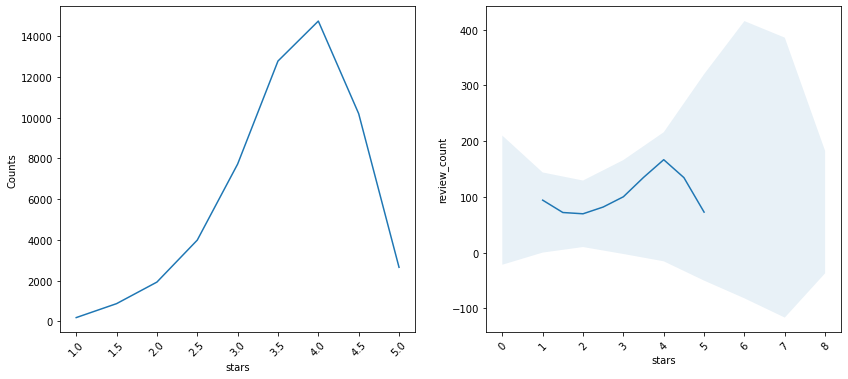

In [36]:
plot_feature(df, 'stars')

- The **'stars'** reviews appears to have more of a normal distribution
- As the **'review_count'** increases, the distribution of stars has a wider spread
- Increase in **'review_count'** diminishes higher **'stars'** review rating

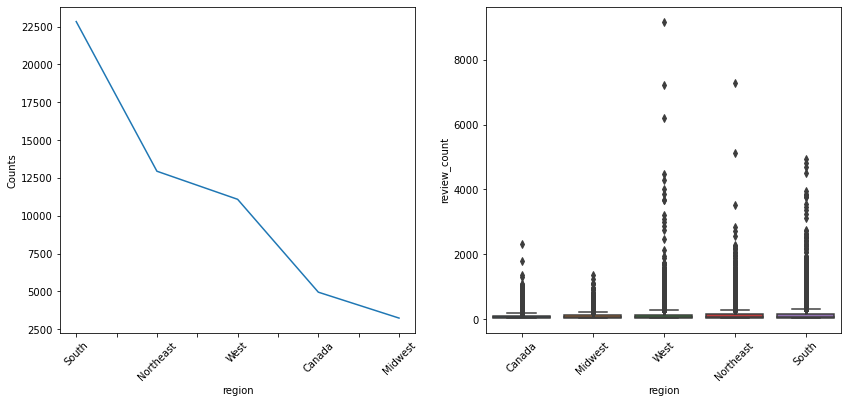

In [37]:
plot_feature(df, 'region')

- Here **'region'** appears to have no distribution, as expected from a categorical feature
- Distribution between **'review_count'** and **'region'** shows that most reviews have a high count of low frequency, as discovered earlier

In [38]:
def encode_label(df, col):
    #encode the categories using average review count for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['review_count'].mean()   
    df[col] = df[col].map(cat_dict)

In [39]:
for col in df.columns:
    if df[col].dtype.name == "category":
        encode_label(df, col)

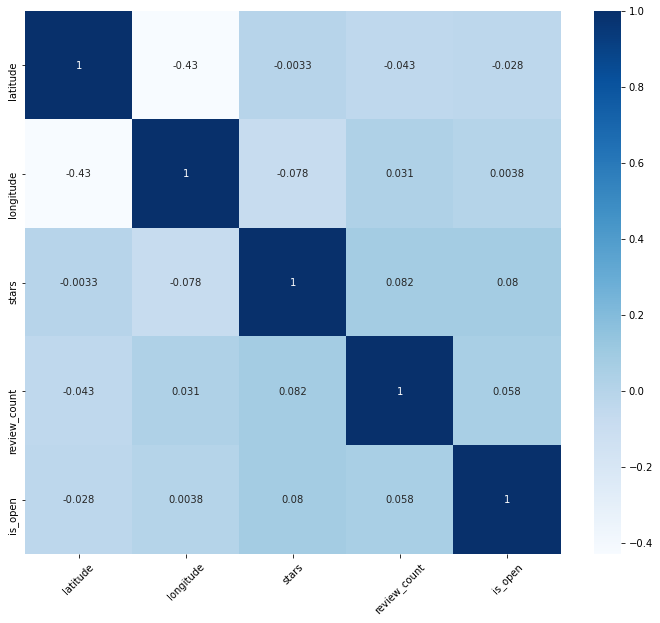

In [40]:
# Correlations between features
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df[list(df.columns)].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

- **'stars'** and **'review_count'** have the strongest correlation

### Plot businesses on a map

- Based on discovery from correlations, plot Yelp businesses on a map
- Reduce dataset to top 90 percentile of unique **'review_count'**
- Further reduce dataset to **'stars'** reviews higher that 4.0 stars

In [41]:
import folium as fo # to create Map figures

In [42]:
top_pct = np.percentile(df['review_count'].unique(), 90) # establish 90 percentile

In [43]:
df2 = df[df['review_count'] > top_pct]

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1850 to 156929
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          131 non-null    object  
 1   state         131 non-null    object  
 2   latitude      131 non-null    float64 
 3   longitude     131 non-null    float64 
 4   stars         131 non-null    float64 
 5   review_count  131 non-null    int64   
 6   is_open       131 non-null    int64   
 7   categories    131 non-null    object  
 8   region        131 non-null    category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 9.5+ KB


In [45]:
df2 = df2[df2['stars'] > 4.0]

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 5220 to 156929
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          50 non-null     object  
 1   state         50 non-null     object  
 2   latitude      50 non-null     float64 
 3   longitude     50 non-null     float64 
 4   stars         50 non-null     float64 
 5   review_count  50 non-null     int64   
 6   is_open       50 non-null     int64   
 7   categories    50 non-null     object  
 8   region        50 non-null     category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 3.8+ KB


In [47]:
lat = df2['latitude']
lon = df2['longitude']
star = df2['stars']
reviews = df2['review_count']

In [48]:
map = fo.Map(location=[39, -100], zoom_start=4)

In [49]:
fg = fo.FeatureGroup(name='Yelp Biz Locations')

In [50]:
for lt, ln, sr, rc in zip(lat, lon, star, reviews):
    msg = f'Stars: {sr}, Reviews: {rc}'
    fg.add_child(fo.Marker(location=[lt, ln], popup=msg, icon= fo.Icon(color='red')))

In [51]:
map.add_child(fg)

- Highest star rated, most reviewed business seems to be in major cities
- Most of these businesses are in the South
- Map output can be found [here](https://dgonzales8096.github.io/Dennis_Gonzales_Project_html_files/Yelp_biz_map.html)

In [54]:
map.save("Yelp_biz_map.png")